# Normalization

We want to normalize data in order to improve classification performance.

In [1]:
%cd ../..
%matplotlib inline

/home/jmperez/projects


In [2]:
import glob
import os

CORPORA_PATH = "~/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/"

file_path = os.path.expanduser(CORPORA_PATH)
files = glob.glob(os.path.join(file_path, "*.set"))


filename = files[11]

In [3]:
import mne

def event_id_func(x):
    return 1 if x == "0" else 2

data_mne = mne.io.read_raw_eeglab(
    filename, preload=True, event_id_func=event_id_func)

data_mne.filter(1, 20)

Reading /home/jmperez/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/PruebasMuseo_27163001.fdt
Reading 0 ... 63231  =      0.000 ...   493.992 secs...
Setting up band-pass filter from 1 - 20 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 5.0 Hz
Filter length of 845 samples (6.602 sec) selected


<RawEEGLAB  |  PruebasMuseo_27163001.fdt, n_channels x n_times : 15 x 63232 (494.0 sec), ~7.3 MB, data loaded>

In [4]:
data_mne.ch_names

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4',
 'STI 014']

In [5]:
events = mne.find_events(data_mne)
baseline = (None, 0)


1800 events found
Events id: [1 2]


In [6]:
event_id = {"D": 1, "T": 2}
epochs = mne.Epochs(
    data_mne, events, event_id,
    baseline=baseline, tmin=-0.1, tmax=0.7)
epochs.load_data()

1800 matching events found
0 projection items activated
Loading data for 1800 events and 104 original time points ...
0 bad epochs dropped


<Epochs  |  n_events : 1800 (all good), tmin : -0.1015625 (s), tmax : 0.703125 (s), baseline : (None, 0), ~21.5 MB, data loaded,
 'D': 1500, 'T': 300>

Channels have 0 mean, but their variance is very small. Let's normalize them

Channel mean = -1.3285597758769287e-06 std = 1.0205132588763702e-05


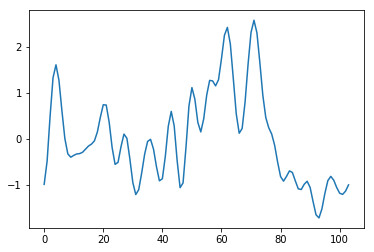

Channel mean = -7.792900226757893e-07 std = 7.632198541456597e-06


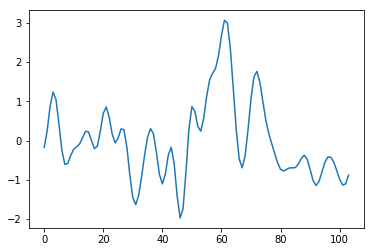

Channel mean = 3.6750972818476622e-06 std = 6.7810579959305855e-06


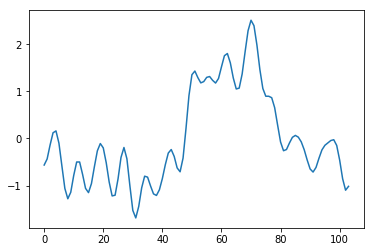

Channel mean = 6.108335063255646e-07 std = 5.8364714196633815e-06


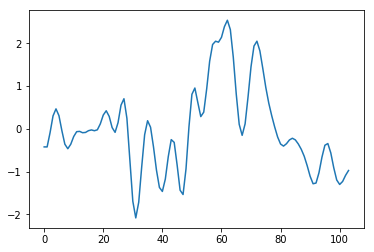

Channel mean = -3.169478250506368e-06 std = 7.561667609506959e-06


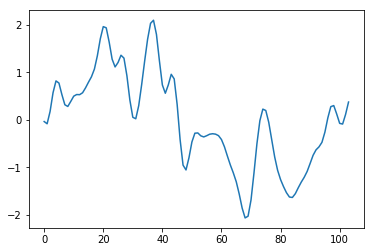

Channel mean = 1.1433296621298404e-05 std = 7.256016208352664e-06


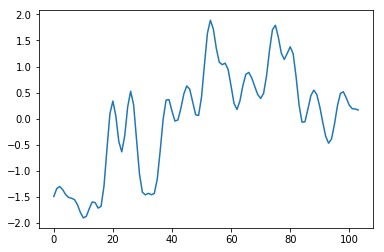

Channel mean = 8.372521779719966e-06 std = 5.410038557619996e-06


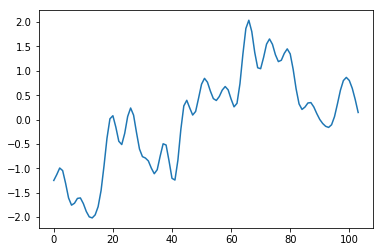

Channel mean = 2.7673627481718206e-06 std = 5.702223838880722e-06


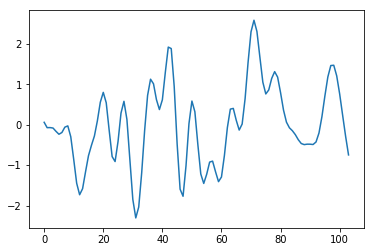

Channel mean = 1.2231813907738544e-05 std = 8.948089339185824e-06


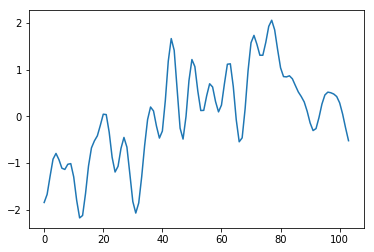

Channel mean = 1.4882353202719317e-06 std = 7.144296356072632e-06


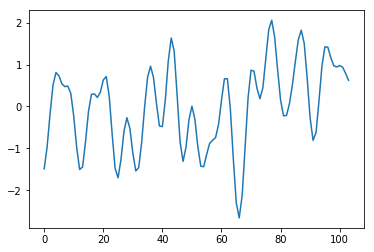

Channel mean = 5.814953937948306e-06 std = 1.0853214048506876e-05


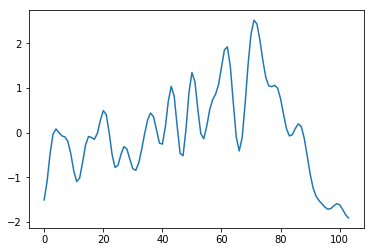

Channel mean = 2.7929978519189095e-07 std = 7.122432658817007e-06


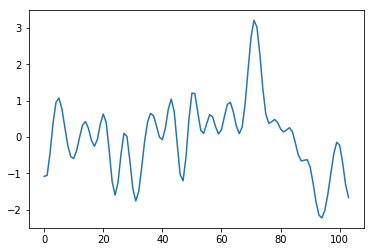

Channel mean = 6.216361851140997e-06 std = 9.214237791431157e-06


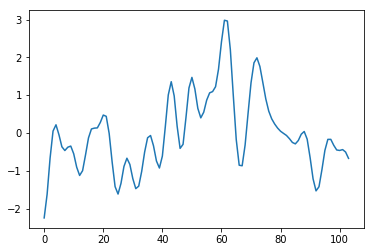

Channel mean = 4.736032598895634e-06 std = 7.388260423370971e-06


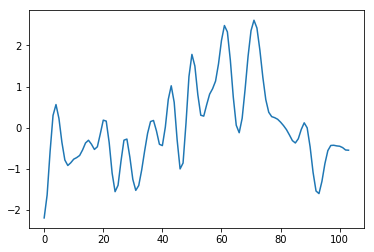

Channel mean = 0.028846153846153848 std = 0.1673739921685501


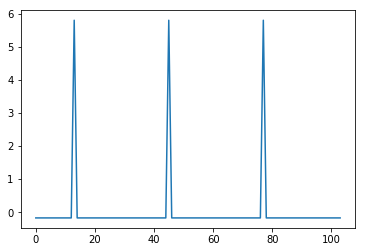

In [7]:
import matplotlib.pyplot as plt
epoch = epochs.get_data()[0]

for channel in epoch:
    m = channel.mean()
    std = channel.std()
    print("Channel mean = {} std = {}".format(m, std))
    plt.plot((channel - m)/std)
    plt.show()

Substract mean and std for each channel.

In [19]:
X = epochs.get_data()[:, :-1]

mean = X.mean(axis=(0, 2)).reshape(-1, 1)
std = X.std(axis=(0, 2)).reshape(-1, 1)

X_norm = (X - mean) / std

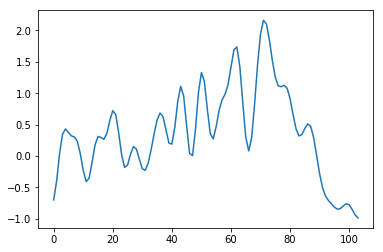

In [21]:
plt.plot(X_norm[0][10])